In [1]:
%matplotlib inline

import math
import matplotlib
import matplotlib.pyplot as plt
import pandas
import random
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

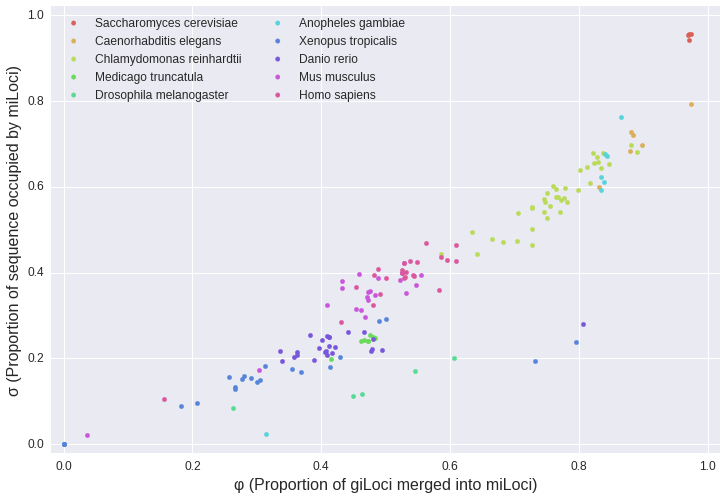

In [2]:
data = pandas.read_table('phisigma-modorg.tsv')
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Agam',
               'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']

seaborn.set_context({"figure.figsize": (12, 8)})
plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

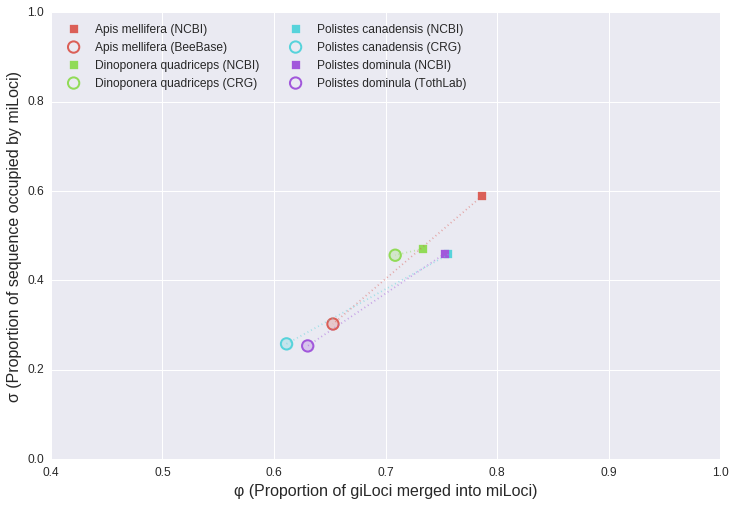

In [3]:
data = pandas.read_table('phisigma-alternates-centroids.tsv')
speciesnames = ['Apis mellifera (NCBI)', 'Apis mellifera (BeeBase)',
                'Dinoponera quadriceps (NCBI)', 'Dinoponera quadriceps (CRG)',
                'Polistes canadensis (NCBI)', 'Polistes canadensis (CRG)',
                'Polistes dominula (NCBI)', 'Polistes dominula (TothLab)']
specieslist = ['Amel', 'Am32', 'Dqua', 'Dqcr',
               'Pcan', 'Pccr', 'Pdom', 'Pdtl']

seaborn.set_context({"figure.figsize": (12, 8)})
plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    if i % 2 == 1:
        continue

    phis = list()
    sigmas = list()
        
    specdata = data.loc[(data.Species == species)]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], marker='s', s=64)
    plots.append(plot)

    specdata = data.loc[(data.Species == specieslist[i+1])]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, alpha=0.25)
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, facecolor='none', lw='2')
    plots.append(plot)
    plot = plt.plot(phis, sigmas, color=palette[i], alpha=0.5, ls=':')
    

_ = plt.xlim(0.4, 1.0)
_ = plt.ylim(0.0, 1.0)
#_ = plt.xlim(0.59, 0.81)
#_ = plt.ylim(0.18, 0.82)
#_ = plt.xlim(-0.02, 1.02)
#_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()